In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [28]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [29]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [30]:
classes[y_train[9][0]]

'cat'

In [31]:
def plot(X,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index][0]])

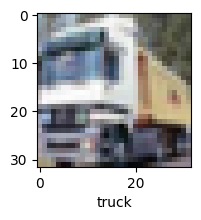

In [32]:
plot(X_train,y_train,1)

In [33]:
X_train = X_train/255
X_test = X_test/255

In [34]:
model = keras.Sequential([

    # CNN
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Models
    keras.layers.Flatten(),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5533 - accuracy: 0.4361
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2402 - accuracy: 0.5583
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1166 - accuracy: 0.6053
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0348 - accuracy: 0.6365
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9722 - accuracy: 0.6566
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9233 - accuracy: 0.6746
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8857 - accuracy: 0.6850
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8458 - accuracy: 0.6981
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8149 - accuracy: 0.7113
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.785

In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8783 - accuracy: 0.6980


[0.8782859444618225, 0.6980000138282776]

In [36]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.8098221e-03, 3.0797935e-05, 1.7221052e-03, 7.3934823e-01,
        3.1569928e-03, 2.4025381e-01, 6.2960340e-03, 6.2587077e-04,
        2.1487202e-03, 6.0766132e-04],
       [1.2008247e-03, 1.1546225e-02, 3.4019678e-07, 6.0169597e-10,
        6.7027148e-11, 8.6393462e-12, 5.6464479e-11, 1.1791069e-12,
        9.8697728e-01, 2.7532288e-04],
       [7.7981547e-02, 4.3703370e-02, 5.3595677e-03, 7.8609167e-03,
        4.5927288e-04, 1.0113306e-03, 1.3865097e-04, 2.2797426e-03,
        8.4558487e-01, 1.5620764e-02],
       [2.7317101e-01, 5.5216949e-02, 2.4195662e-02, 2.7075980e-03,
        1.1238372e-03, 2.1942810e-04, 7.0596120e-04, 4.8745365e-04,
        6.3501233e-01, 7.1598282e-03],
       [1.1408750e-05, 9.5014687e-04, 1.1686727e-02, 2.2483923e-02,
        7.1099140e-02, 2.2373812e-03, 8.9152640e-01, 2.3840669e-06,
        1.5734084e-06, 9.5896428e-07]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

# Hand Written Digits Recognition


In [39]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
X_train = X_train / 255
X_test = X_test / 255

In [41]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [42]:
X_train_flattened.shape

(60000, 784)

In [48]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [49]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [59]:
model_1 = keras.Sequential([
    keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(784, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_1.fit(X_train, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1229 - accuracy: 0.9625
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0388 - accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0113 - accuracy: 0.9962


In [60]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9855


[0.046533189713954926, 0.9854999780654907]

In [75]:
y_pred = model_1.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([1.3574712e-04, 1.1912305e-02, 3.4929581e-03, 3.2236002e-02,
       1.3514265e-03, 2.5281759e-06, 3.1066179e-09, 1.0000000e+00,
       1.1361033e-04, 1.2717205e-02], dtype=float32)

In [81]:
np.argmax(y_pred[38])

2

In [80]:
y_test[38]

2

In [85]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [86]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)